# 导入模块

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# 读取和查看数据，检查异常

In [6]:
df = pd.read_table('CDNOW.txt', header=None, sep='\s+', converters={ 0: str})
names = ['id', 'trade_date', 'num', 'total_price']
df.columns = names
df.head()

,id,trade_date,num,total_price
0,00001,19970101,1,11.77
1,00002,19970112,1,12.00
2,00002,19970112,5,77.00
3,00003,19970102,2,20.76
4,00003,19970330,2,20.76


In [7]:
data.tail()

,id,trade_date,num,total_price
69654,23568,19970405,4,83.74
69655,23568,19970422,1,14.99
69656,23569,19970325,2,25.74
69657,23570,19970325,3,51.12
69658,23570,19970326,2,42.96


In [8]:
df.describe()# 注意Num最小值为1，但total_price最小值为0

,trade_date,num,total_price
count,6.965900e+04,69659.000000,69659.000000
mean,1.997228e+07,2.410040,35.893648
std,3.837735e+03,2.333924,36.281942
min,1.997010e+07,1.000000,0.000000
25%,1.997022e+07,1.000000,14.490000
50%,1.997042e+07,2.000000,25.980000
75%,1.997111e+07,3.000000,43.700000
max,1.998063e+07,99.000000,1286.010000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
id             69659 non-null object
trade_date     69659 non-null int64
num            69659 non-null int64
total_price    69659 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.9+ MB


In [10]:
df['order_date'] = pd.to_datetime(df.trade_date, format = '%Y%m%d')# 格式化时间

In [12]:
df.head()

,id,trade_date,num,total_price,order_date
0,00001,19970101,1,11.77,1997-01-01
1,00002,19970112,1,12.00,1997-01-12
2,00002,19970112,5,77.00,1997-01-12
3,00003,19970102,2,20.76,1997-01-02
4,00003,19970330,2,20.76,1997-03-30


In [16]:
from datetime import datetime

In [50]:
#df['month_factor'] = df['order_date'].apply(lambda x: x.month)
df['month'] = df['order_date'].values.astype('datetime64[M]')# 按月份划分

In [51]:
df.head()

,id,trade_date,num,total_price,order_date,month_factor,month
0,00001,19970101,1,11.77,1997-01-01,1,1997-01-01
1,00002,19970112,1,12.00,1997-01-12,1,1997-01-01
2,00002,19970112,5,77.00,1997-01-12,1,1997-01-01
3,00003,19970102,2,20.76,1997-01-02,1,1997-01-01
4,00003,19970330,2,20.76,1997-03-30,3,1997-03-01


# 数据分组探索

In [52]:
user_grouped = df.groupby('id').sum()#按用户分组求和

In [53]:
user_grouped.head()

,trade_date,num,total_price,month_factor
id,,,,
00001,19970101,1,11.77,1
00002,39940224,6,89.00,2
00003,119833602,16,156.46,35
00004,79882233,7,100.50,22
00005,219686137,29,385.61,60


In [54]:
user_grouped.describe()

,trade_date,num,total_price,month_factor
count,2.357000e+04,23570.000000,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426,12.901273
std,9.460684e+07,16.983531,240.925195,28.710688
min,1.997010e+07,1.000000,0.000000,1.000000
25%,1.997021e+07,1.000000,19.970000,2.000000
50%,1.997032e+07,3.000000,43.395000,3.000000
75%,5.992125e+07,7.000000,106.475000,14.000000
max,4.334408e+09,1033.000000,13990.930000,1350.000000


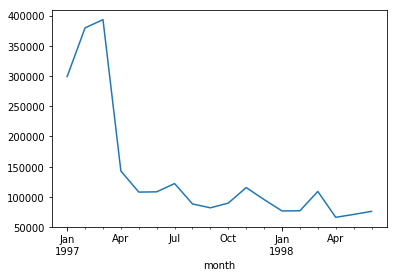

In [55]:
df.groupby('month').total_price.sum().plot()#以月为窗口进行透视，发现早期消费金额很高，后边逐渐下降。

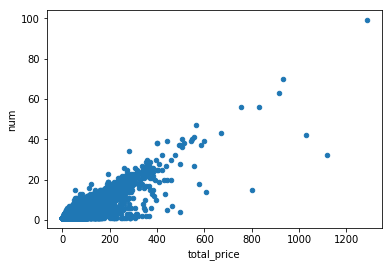

In [56]:
df.plot.scatter(x = 'total_price', y = 'num')# 每笔订单散点图

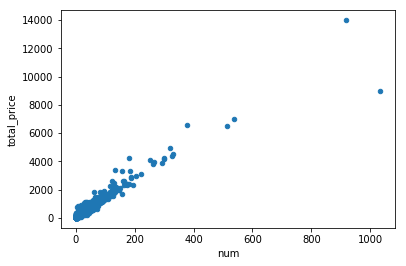

In [57]:
df.groupby('id').sum().plot.scatter(x = 'num', y = 'total_price')#每个用户散点图

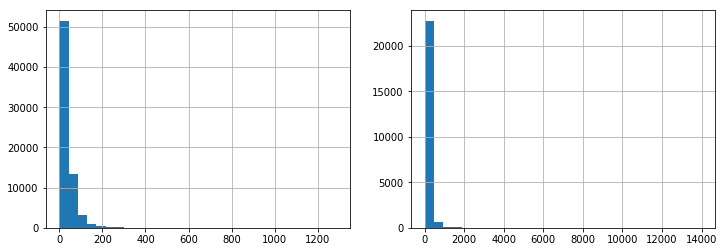

In [58]:
# 分析单个用户的消费行为
plt.figure(figsize = (12,4))
plt.subplot(121)
df.total_price.hist(bins = 30)
plt.subplot(122)
df.groupby('id').total_price.sum().hist(bins = 30)

In [59]:
df.groupby('id').month.min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [60]:
df.groupby('id').month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

# 数据透视表

In [61]:
# 以用户和月份交易频次进行透视
pivoted_counts = df.pivot_table(index='id',columns='month',values='trade_date',aggfunc='count').fillna(0)

In [62]:
columns_month = df.month.sort_values().astype('str').unique()
pivoted_counts.columns = columns_month
pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
id,,,,,,,,,,,,,,,,,,
00001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00002,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00003,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
00004,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
00005,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [63]:
pivoted_counts_transf = pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)
pivoted_counts_transf.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
id,,,,,,,,,,,,,,,,,,
00001,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00002,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00003,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
00004,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
00005,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [64]:
fg = pivoted_counts_transf.sum()/pivoted_counts_transf.count()

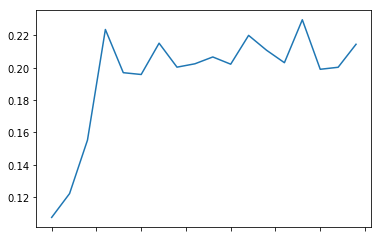

In [65]:
fg.plot()

In [67]:
# 以用户和月份交易金额进行透视
pivoted_amount = df.pivot_table(index='id',columns='month',values='total_price',aggfunc='mean').fillna(0)
columns_month = df.month.sort_values().astype('str').unique()
pivoted_amount.columns = columns_month
pivoted_amount.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
id,,,,,,,,,,,,,,,,,,
00001,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
00002,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
00003,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
00004,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
00005,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [68]:
pivoted_purchase = pivoted_amount.applymap(lambda x: 1 if x > 0 else 0)
pivoted_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
id,,,,,,,,,,,,,,,,,,
00001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
00002,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
00003,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
00004,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
00005,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


# 回购率分析

In [80]:
def purchase_return(data):
    status = []
    for i in range(17):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return status

如果用户本月有消费，且下月有消费，记为1，下月无消费，记为0；如果用户本月没有消费，记为NaN。 用apply函数且axis=1，应用在所有行上。

In [81]:
len(np.unique(df.month))

18

In [83]:
pivoted_purchase_return = pivoted_purchase.apply(purchase_return, axis = 1)
columns_month = df.month.sort_values().astype('str').unique()
user_id = pivoted_purchase.index
pivoted_purchase_return.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
id,,,,,,,,,,,,,,,,,,
00001,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00002,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00003,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
00004,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
00005,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [85]:
pivoted_purchase_return1 = pd.DataFrame(pivoted_purchase_return,columns = columns_month, index = user_id)
pivoted_purchase_return1.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
id,,,,,,,,,,,,,,,,,,
00001,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00002,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00003,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
00004,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
00005,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


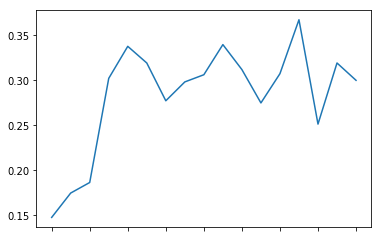

In [89]:
#pivoted_purchase_return1.mean().plot(figsize = (10,4))# 用户回购率
pivoted_purchase_return1.mean().plot()

# 用户分层

In [90]:
def active_ststus(data):
    status = []
    for i in range(18):
        #若本月没有消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        #若本月有消费
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return status

按照用户的消费行为，将其分为4个维度：新用户、活跃用户、不活跃用户、回流用户。 新用户指第一次消费。活跃用户即老客，指在某一个时间窗口内有过消费。不活跃用户指在某一个时间窗口内没有消费过的老客。回流用户指在上一个窗口内没有消费，在当前窗口内有消费。以上窗口按月计。 例如，某一个用户，在1月份首次消费即是新用户；他在2月份又消费，则是活跃用户；3月份不消费，属于不活跃用户；4月份消费，此时是回流用户，5月份又消费，属于活跃用户。 

In [91]:
pivoted_purchase_status = pivoted_purchase.apply(lambda x: active_ststus(x), axis = 1)
columns_month = df.month.sort_values().astype('str').unique()
user_id = pivoted_purchase.index
pivoted_purchase_status1 = pd.DataFrame(pivoted_purchase_status,columns = columns_month, index = user_id)
pivoted_purchase_status1.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
id,,,,,,,,,,,,,,,,,,
00001,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
00002,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
00003,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
00004,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
00005,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [93]:
purchase_status1_counts = pivoted_purchase_status1.replace('unreg', np.NaN).apply(pd.value_counts)
#此时apply是在列上执行运算
#把unreg状态排除掉，他是未来作为新客，只是一个暂时状态。然后计算不同分层每月的统计量
purchase_status1_counts

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1155.0,1680,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624,632.0,512.0,472.0,569.0,517.0,458.0,446.0
new,7814.0,8455.0,7231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1402,1232.0,1025.0,1079.0,1489.0,919.0,1030.0,1060.0
unactive,NaN,6659.0,13994,20678.0,21286.0,21161.0,21320.0,21728.0,21761.0,21661.0,21474,21638.0,21965.0,21951.0,21444.0,22066.0,22014.0,21996.0


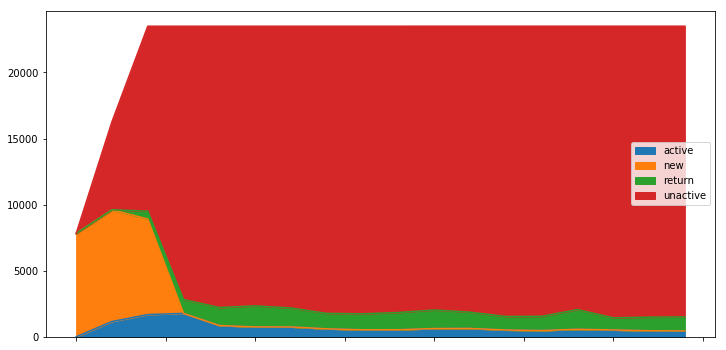

In [94]:
purchase_status1_counts.fillna(0).T.plot.area(figsize = (12,6))

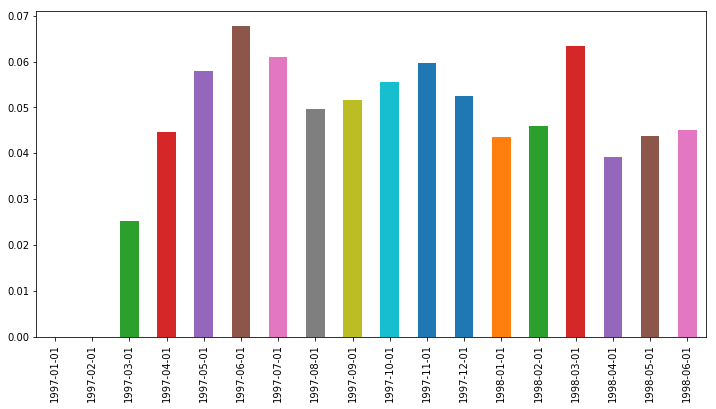

In [95]:
return_rate = purchase_status1_counts.apply(lambda x: x/x.sum())
return_rate.loc['return'].plot.bar(figsize = (12,6)) #每个月回流用户的占比

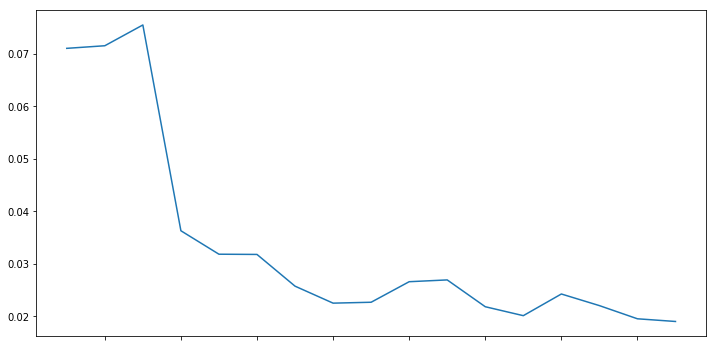

In [96]:
return_rate.loc['active'].plot(figsize = (12,6)) #每月活跃用户的占比

# 高质量用户分析

In [99]:
user_amount = df.groupby('id').total_price.sum().sort_values().reset_index()
user_amount['amount_cumsum'] = user_amount.total_price.cumsum()
user_amount.tail()

,id,total_price,amount_cumsum
23565,07931,6497.18,2463822.60
23566,19339,6552.70,2470375.30
23567,07983,6973.07,2477348.37
23568,14048,8976.33,2486324.70
23569,07592,13990.93,2500315.63


In [100]:
amount_total = user_amount.amount_cumsum.max()
user_amount['prop'] = user_amount.apply(lambda x: x.amount_cumsum/amount_total, axis = 1)
user_amount.tail()

,id,total_price,amount_cumsum,prop
23565,07931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,07983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404
23569,07592,13990.93,2500315.63,1.000000


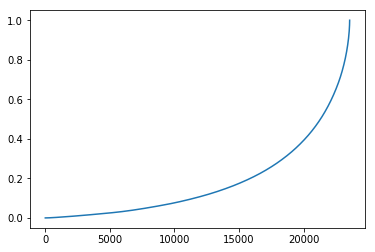

In [101]:
user_amount.prop.plot()

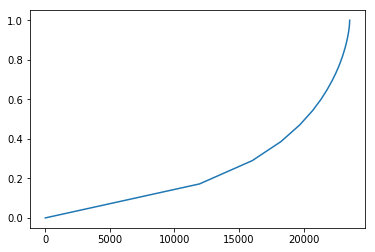

In [103]:
user_counts = df.groupby('id').trade_date.count().sort_values().reset_index()
user_counts['counts_cumsum'] = user_counts.trade_date.cumsum()
counts_total = user_counts.counts_cumsum.max()
user_counts['prop'] = user_counts.apply(lambda x: x.counts_cumsum/counts_total, axis = 1)
user_counts.prop.plot()

# 计算用户生命周期

In [106]:
user_purchase = df[['id', 'order_date', 'num', 'total_price']]
order_date_min = user_purchase.groupby('id').order_date.min()
order_date_max = user_purchase.groupby('id').order_date.max()
(order_date_max-order_date_min).head(10)

id
00001     0 days
00002     0 days
00003   511 days
00004   345 days
00005   367 days
00006     0 days
00007   445 days
00008   452 days
00009   523 days
00010     0 days
Name: order_date, dtype: timedelta64[ns]

In [107]:
life_time = (order_date_max-order_date_min).reset_index() #转换为dataframe类型
life_time.head()

,id,order_date
0,00001,0 days
1,00002,0 days
2,00003,511 days
3,00004,345 days
4,00005,367 days


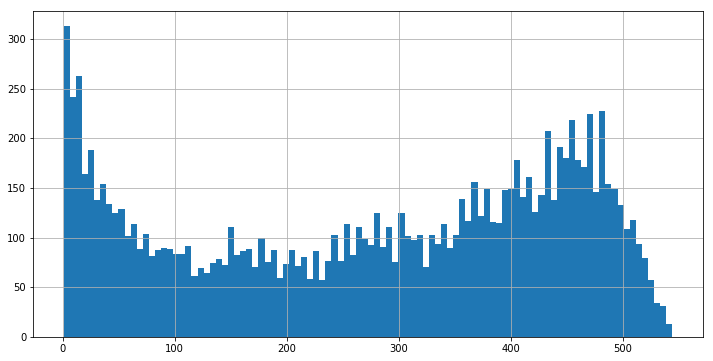

In [108]:
life_time['life_time'] = life_time.order_date/np.timedelta64(1,'D')
life_time[life_time.life_time>0].life_time.hist(bins = 100, figsize = (12,6))

# 计算留存率

In [109]:
user_purchase_retention = pd.merge(left = user_purchase, right = order_date_min.reset_index(),
                                   how = 'inner', on = 'id',
                                   suffixes = ('', '_min')
                                  )
user_purchase_retention.head()

,id,order_date,num,total_price,order_date_min
0,00001,1997-01-01,1,11.77,1997-01-01
1,00002,1997-01-12,1,12.00,1997-01-12
2,00002,1997-01-12,5,77.00,1997-01-12
3,00003,1997-01-02,2,20.76,1997-01-02
4,00003,1997-03-30,2,20.76,1997-01-02


In [110]:
user_purchase_retention['order_date_diff'] = user_purchase_retention.order_date-user_purchase_retention.order_date_min
#将日期转化为时间
user_purchase_retention['date_diff'] = user_purchase_retention.order_date_diff.apply(lambda x: x/np.timedelta64(1,'D')) #日期转换为时间
user_purchase_retention.head()

,id,order_date,num,total_price,order_date_min,order_date_diff,date_diff
0,00001,1997-01-01,1,11.77,1997-01-01,0 days,0.0
1,00002,1997-01-12,1,12.00,1997-01-12,0 days,0.0
2,00002,1997-01-12,5,77.00,1997-01-12,0 days,0.0
3,00003,1997-01-02,2,20.76,1997-01-02,0 days,0.0
4,00003,1997-03-30,2,20.76,1997-01-02,87 days,87.0


In [111]:
bin = [0,3,7,15,30,60,90,180,365]
user_purchase_retention['date_diff_bin'] = pd.cut(user_purchase_retention.date_diff, bins = bin)
user_purchase_retention.head(10)

,id,order_date,num,total_price,order_date_min,order_date_diff,date_diff,date_diff_bin
0,00001,1997-01-01,1,11.77,1997-01-01,0 days,0.0,NaN
1,00002,1997-01-12,1,12.00,1997-01-12,0 days,0.0,NaN
2,00002,1997-01-12,5,77.00,1997-01-12,0 days,0.0,NaN
3,00003,1997-01-02,2,20.76,1997-01-02,0 days,0.0,NaN
4,00003,1997-03-30,2,20.76,1997-01-02,87 days,87.0,"(60, 90]"
5,00003,1997-04-02,2,19.54,1997-01-02,90 days,90.0,"(60, 90]"
6,00003,1997-11-15,5,57.45,1997-01-02,317 days,317.0,"(180, 365]"
7,00003,1997-11-25,4,20.96,1997-01-02,327 days,327.0,"(180, 365]"
8,00003,1998-05-28,1,16.99,1997-01-02,511 days,511.0,NaN
9,00004,1997-01-01,2,29.33,1997-01-01,0 days,0.0,NaN


In [114]:
pivoted_retention = user_purchase_retention.pivot_table(index = 'id', columns = 'date_diff_bin',
                                                       values = 'total_price', aggfunc = sum, dropna = False)
pivoted_retention.head()

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
id,,,,,,,,
00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00003,NaN,NaN,NaN,NaN,NaN,40.3,NaN,78.41
00004,NaN,NaN,NaN,29.73,NaN,NaN,NaN,41.44
00005,NaN,NaN,13.97,NaN,38.9,NaN,110.4,155.54


In [115]:
pivoted_retention_trans = pivoted_retention.fillna(0).applymap(lambda x: 1 if x>0 else 0)
pivoted_retention_trans.head()

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
id,,,,,,,,
00001,0,0,0,0,0,0,0,0
00002,0,0,0,0,0,0,0,0
00003,0,0,0,0,0,1,0,1
00004,0,0,0,1,0,0,0,1
00005,0,0,1,0,1,0,1,1


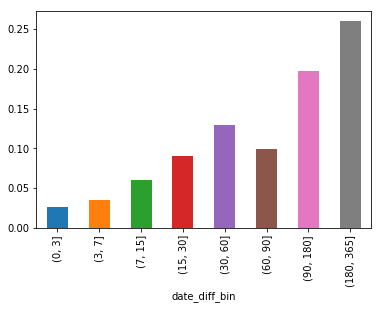

In [116]:
pivoted_retention_trans.mean().plot.bar()

# 计算用户的消费间隔

In [118]:
def diff(group):
    d = group.date_diff - group.date_diff.shift(-1)
    #shift(-1)是向下偏移一个位置；shift()是向上偏移一个位置；加参数axis=1则是左右偏移
    return d
last_diff = user_purchase_retention.groupby('id').apply(diff)
last_diff.head(10).reset_index()

,id,level_1,date_diff
0,00001,0,NaN
1,00002,1,0.0
2,00002,2,NaN
3,00003,3,-87.0
4,00003,4,-3.0
5,00003,5,-227.0
6,00003,6,-10.0
7,00003,7,-184.0
8,00003,8,NaN
9,00004,9,-17.0


In [119]:
last_diff.mean()

-68.97376814424265

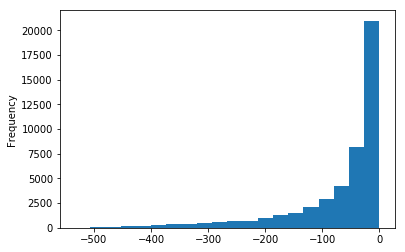

In [120]:
last_diff.plot.hist(bins = 20)

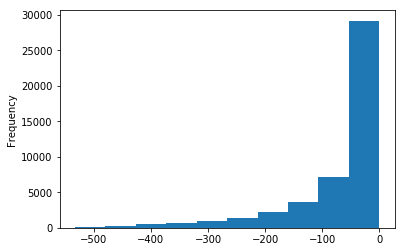

In [121]:
last_diff.plot.hist()